# Introduction

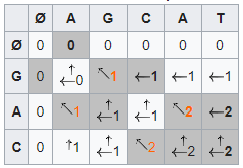

In this notebook I will use the LCS (Longest Common Subsequence) algorithm for finding similar sounding word pairs in the ETCBC database. The problem was first brought up by [Lidvar Andvik (PhD student, Andrews University, SDATS)](https://www.linkedin.com/in/lidvar-andvik-1ba849182).

He was asking whether it is possible to detect similar sounding word pairs in the TNK. As an example he used [Isa 53:11](https://ref.ly/logosres/bhssesb?ref=BibleBHS.Is53.11):

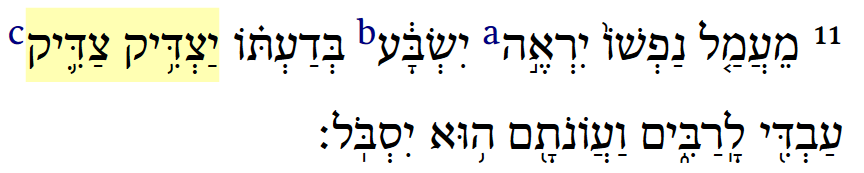

As one can see the words used in predicate and object position are very similar and belong to the same lexical family. However, they are two different lexemes:

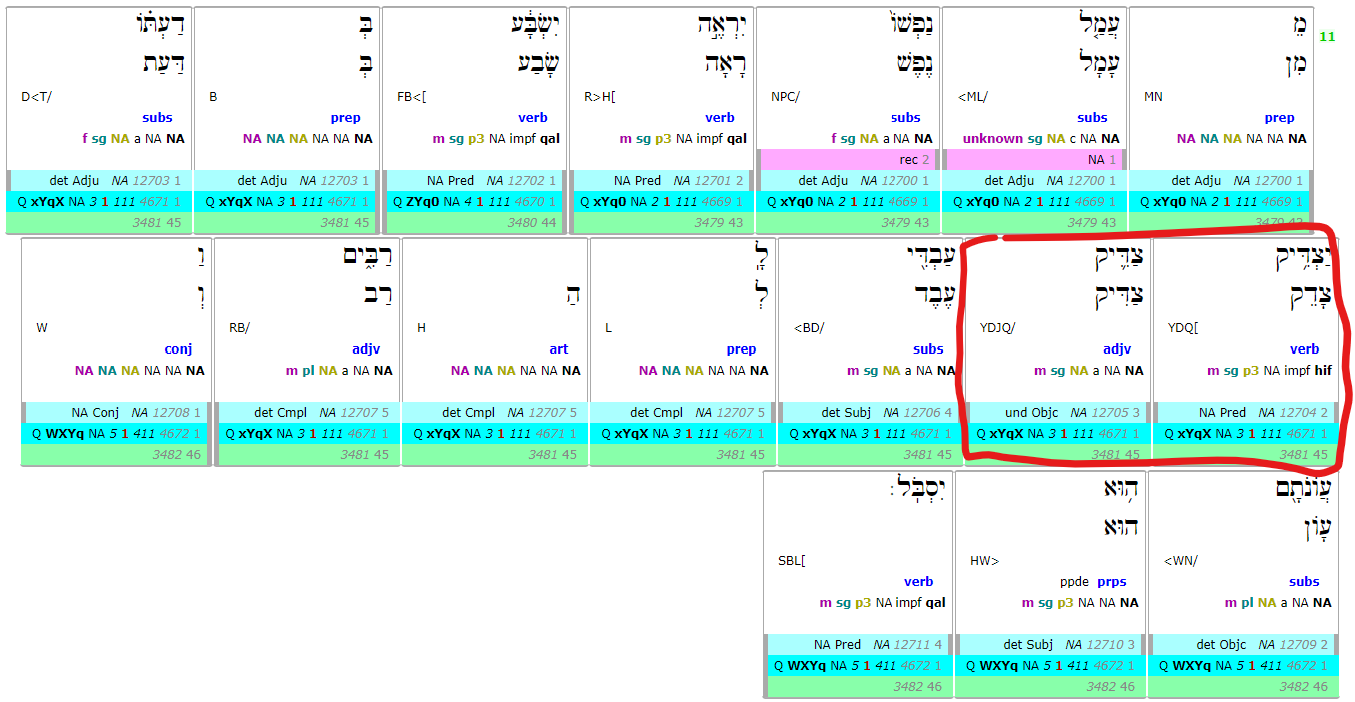

See the syntactic structure on SHEBANQ ([bhsa4 Isaiah 53:1](https://shebanq.ancient-data.org/hebrew/text?qactive=hlcustom&qsel_one=grey&qpub=x&qget=x&wactive=hlcustom&wsel_one=gray&wpub=x&wget=x&nactive=hlcustom&nsel_one=black&npub=v&nget=x&chapter=53&lang=en&book=Jesaia&qw=m&tr=hb&tp=txt_p&iid=&verse=1&version=4&mr=m&page=1&wd4_statfl=v&ph_arela=v&wd4_statrl=v&sn_an=v&cl=v&wd1_lang=x&wd1_subpos=x&wd2_person=v&sp_rela=v&wd1_pdp=x&sn_n=v&wd3_uvf=x&ph_fun=v&wd1_nmtp=v&gl=v&sp_n=v&pt=v&ph_an=v&ph_typ=x&cl_typ=v&tt=v&wd4_statro=x&wd3_vbs=x&wd1=v&tl=x&wd3=x&wd4=v&wd2_gender=v&ph=v&wd3_vbe=v&wd1_pos=v&ph_det=v&ph_rela=x&wd4_statfo=x&tl_tlv=x&wd2_stem=v&wd2_state=v&ht=v&ph_n=v&tl_tlc=x&cl_tab=v&wd3_nme=x&hl=v&cl_par=v&cl_an=v&cl_n=v&wd3_prs=v&wd3_pfm=x&sp=v&cl_code=v&ht_hk=v&wd2=v&hl_hlc=x&cl_rela=v&wd2_gnumber=v&wd2_tense=v&cl_txt=v&wd1_n=x&sn=v&ht_ht=v&hl_hlv=v&pref=alt))

In this notebook, then, I will do the following:
1. Use a LCS algorithm and adapt it to work with python3.
2. Run some simple tests.
3. Build a BHS based TF query and store the results as a dataframe.
4. Load the query results as a pandas dataframe and clean up the table.
5. Run the LCS algrorithm throgh each row of the dataframe.

For an introduction to the LCS approach see the following links: https://en.wikipedia.org/wiki/Longest_common_subsequence_problem
https://youtu.be/sSno9rV8Rhg

For the coding of the LCS alogrithm see: https://www.geeksforgeeks.org/longest-common-subsequence-dp-4/

**Recognition**: I am particularly helpful for the tips and insights received from (Rodeney Summerscales, Prof of Computer Science, Andrews University)[https://www.andrews.edu/~summersc/]. He helped me understand the LCS algorithm and hinted at the `apply` function for processing an entire data frame.

# Prelude
We first load the different pyhton functions and the Text Fabric tool with its BHS database.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections, math, random, re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [4]:
A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... connected
Using TF-app in C:\Users\Oliver Glanz/text-fabric-data/annotation/app-bhsa/code:
	rv1.2=#5fdf1778d51d938bfe80b37b415e36618e50190c (latest release)
	connecting to online GitHub repo etcbc/bhsa ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6=#bac4a9f5a2bbdede96ba6caea45e762fe88f88c5 (latest release)
	connecting to online GitHub repo etcbc/phono ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/phono/tf/c:
	r1.2=#1ac68e976ee4a7f23eb6bb4c6f401a033d0ec169 (latest release)
	connecting to online GitHub repo etcbc/parallels ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/parallels/tf/c:
	r1.2=#395dfe2cb69c261862fab9f0289e594a52121d5c (latest release)
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used


# Longest Common Subsequence function as `LCS`
## Defining `LCS`
Here I am following to a great extent the code found here:

https://www.geeksforgeeks.org/longest-common-subsequence-dp-4/

and

https://www.geeksforgeeks.org/printing-longest-common-subsequence/


Its python2 based code and needs to be fixed so that it can run within a python3 based environment (`xrange` => `range`).

In [5]:
# Dynamic programming implementation of LCS problem 
  
# Returns length of LCS for X[0..m-1], Y[0..n-1]  
def lcs(X, Y, m, n): 
    L = [[0 for x in range(n+1)] for x in range(m+1)] 
  
    # Following steps build L[m+1][n+1] in bottom up fashion. Note 
    # that L[i][j] contains length of LCS of X[0..i-1] and Y[0..j-1]  
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0: 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1] + 1
            else: 
                L[i][j] = max(L[i-1][j], L[i][j-1]) 
  
    # Following code is used to print LCS 
    index = L[m][n] 
  
    # Create a character array to store the lcs string 
    lcs = [""] * (index+1) 
    lcs[index] = "" 
  
    # Start from the right-most-bottom-most corner and 
    # one by one store characters in lcs[] 
    i = m 
    j = n 
    while i > 0 and j > 0: 
  
        # If current character in X[] and Y are same, then 
        # current character is part of LCS 
        if X[i-1] == Y[j-1]: 
            lcs[index-1] = X[i-1] 
            i-=1
            j-=1
            index-=1
  
        # If not same, then find the larger of two and 
        # go in the direction of larger value 
        elif L[i-1][j] > L[i][j-1]: 
            i-=1
        else: 
            j-=1
    # Now we want to print the results
    print("LCS of " + X + " and " + Y + " is " + "".join(lcs))

## Testing LCS
### Simple Test with Latin characters

In [6]:
# Driver program 
X = "AGGTAB"
Y = "GXTXAYB"
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of AGGTAB and GXTXAYB is GTAB


### Simple Test with Hebrew characters form Isa 53:11
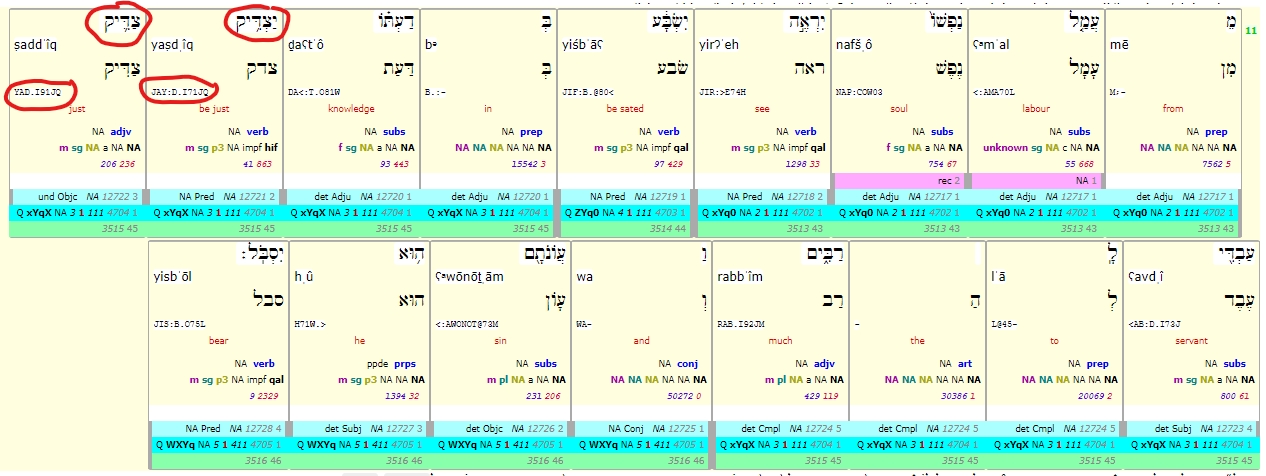


In [7]:
X = "יַצְדִּ֥יק"
Y = "צַדִּ֛יק"
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of יַצְדִּ֥יק and צַדִּ֛יק is צדִּיק


In [8]:
X = "JAY:D.I71JQ"
Y = "YAD.I91JQ"
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of JAY:D.I71JQ and YAD.I91JQ is YD.I1JQ


There are two alternatives of applying the function:

In [9]:
# Option#1
X = "testing"
Y = "rest"
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of testing and rest is est


In [10]:
# Option#2
lcs("testing", "rest", len("testing"), len("rest")) 

LCS of testing and rest is est


### Experimenting with Lists...

In [11]:
preds = ["bites", "drinks"]
objcs = ["Brits", "drunk"]
X = preds[0]
Y = objcs[0]
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of bites and Brits is its


# Producing a dataframe for our `LCS` function
## Building and Running a TF query
For the purpose of testing our workflow we will create just a very limited dataframe by searching only predicates with the lexeme YDQ[ and the attached object phrase. We also make sure that there is only one word appearing in each Predicate and Object phrase by using `::`. 

In [12]:
PredObjcWordLists = '''
book
 clause
    phrase function=Pred
        :: word lex=YDQ[
    phrase function=Objc
        :: word lex   
'''
PredObjcWordLists  = A.search(PredObjcWordLists)
A.table(PredObjcWordLists, start=1, end=5, condensed=False)

  1.40s 6 results


n,p,book,clause,phrase,word,phrase,word
1,Exodus 23:7,,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,אַצְדִּ֖יק,רָשָֽׁע׃,רָשָֽׁע׃
2,Isaiah 53:11,,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽרַבִּ֑ים,יַצְדִּ֥יק,יַצְדִּ֥יק,צַדִּ֛יק,צַדִּ֛יק
3,Jeremiah 3:11,,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִבֹּגֵדָ֖ה יְהוּדָֽה׃,צִדְּקָ֥ה,צִדְּקָ֥ה,נַפְשָׁ֖הּ,נַפְשָׁ֖הּ
4,Job 9:2,,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,יִּצְדַּ֖ק,מַה־,מַה־
5,Job 27:5,,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,אַצְדִּ֪יק,אַצְדִּ֪יק,אֶ֫תְכֶ֥ם,אֶ֫תְכֶ֥ם


## Exporting the TF query results and loading them as a pandas dataframe

In [13]:
A.export(PredObjcWordLists, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='PredObjcWordLists.tsv')

In [14]:
PredObjcWordLists=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/PredObjcWordLists.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
PredObjcWordLists.head()

,R,S1,S2,S3,NODE1,TYPE1,NODE2,TYPE2,TEXT2,NODE3,TYPE3,TEXT3,function3,NODE4,TYPE4,TEXT4,lex4,NODE5,TYPE5,TEXT5,function5,NODE6,TYPE6,TEXT6,lex6
0,1,Exodus,23,7,426586,book,436031,clause,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,677104,phrase,אַצְדִּ֖יק,Pred,41141,word,אַצְדִּ֖יק,YDQ[,677105,phrase,רָשָֽׁע׃,Objc,41142,word,רָשָֽׁע׃,RC</
1,2,Isaiah,53,11,426596,book,472749,clause,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,786360,phrase,יַצְדִּ֥יק,Pred,230736,word,יַצְדִּ֥יק,YDQ[,786361,phrase,צַדִּ֛יק,Objc,230737,word,צַדִּ֛יק,YDJQ/
2,3,Jeremiah,3,11,426597,book,474139,clause,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,790154,phrase,צִדְּקָ֥ה,Pred,236230,word,צִדְּקָ֥ה,YDQ[,790155,phrase,נַפְשָׁ֖הּ,Objc,236231,word,נַפְשָׁ֖הּ,NPC/
3,4,Job,9,2,426612,book,498077,clause,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,854715,phrase,יִּצְדַּ֖ק,Pred,338284,word,יִּצְדַּ֖ק,YDQ[,854714,phrase,מַה־,Objc,338283,word,מַה־,MH
4,5,Job,27,5,426612,book,499246,clause,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,857978,phrase,אַצְדִּ֪יק,Pred,342408,word,אַצְדִּ֪יק,YDQ[,857979,phrase,אֶ֫תְכֶ֥ם,Objc,342409,word,אֶ֫תְכֶ֥ם,>T


## Cleaning up the dataframe
### Lets first drop some irrelelvant columns

In [15]:
PredObjcWordLists=PredObjcWordLists.drop(columns=["NODE1", "NODE1", "NODE2", "NODE3", "NODE4", "NODE5", "NODE6", "TYPE1", "TYPE2", "TYPE3", "lex4", "lex6"])
PredObjcWordLists

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־
4,5,Job,27,5,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,אַצְדִּ֪יק,Pred,word,אַצְדִּ֪יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את


### Lets now rename some column names

In [16]:
PredObjcWordLists.rename(columns={"S1": "book", "S2": "chapter", "S3": "verse", "TEXT2": "clause", "TEXT3": "Pred-Phrase", "TEXT5": "Objc-Phrase"})

,R,book,chapter,verse,clause,Pred-Phrase,function3,TYPE4,TEXT4,TYPE5,Objc-Phrase,function5,TYPE6,TEXT6
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־
4,5,Job,27,5,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,אַצְדִּ֪יק,Pred,word,אַצְדִּ֪יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את


# Applying the simple `lcs` function to each row `axis=1` with `apply` and `lambda row`

In the code below I seek to add to the dataframe an additional colum 
```python
PredObjcWordLists['lcsresults']
```

that contains the results of the applied `lcs` function. The `lcs` function contains 4 arguments as seen below:

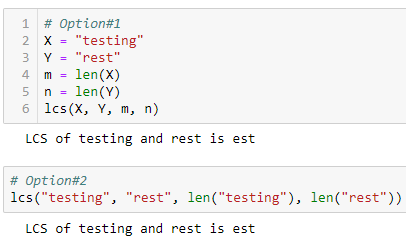

I will use option#2 and define the arguments **X, Y, m, n** as follows with the `lamda row` function
```python
(lambda row : lcs(row['TEXT4'], row['TEXT6'], len(row['TEXT4']), len(row['TEXT6'])), axis = 1)
```

Since I want to have the `lcs` function travel through each row. In order to accomplish this, I am using the `apply` function and have it travel the `lcs` function through each row (i.e. along `axis=1`):
```python
PredObjcWordLists.apply(lambda row : lcs(row['TEXT4'], row['TEXT6'], len(row['TEXT4']), len(row['TEXT6'])), axis = 1)
```

In [17]:
PredObjcWordLists['lcsresults']=PredObjcWordLists.apply(lambda row : lcs(row['TEXT4'], row['TEXT6'], len(row['TEXT4']), len(row['TEXT6'])), axis = 1)

LCS of אַצְדִּ֖יק  and רָשָֽׁע׃  is  
LCS of יַצְדִּ֥יק  and צַדִּ֛יק  is צדִּיק 
LCS of צִדְּקָ֥ה  and נַפְשָׁ֖הּ  is ְָה 
LCS of יִּצְדַּ֖ק  and מַה־ is ַ
LCS of אַצְדִּ֪יק  and אֶ֫תְכֶ֥ם  is אְ 
LCS of צָדַ֣קְתָּ  and זֹ֣את  is ֣ת 


In [18]:
PredObjcWordLists.head(2)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,None
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,None


## Adjusting the `lcs` function into a `lcsreturn` function
As can be seen, the `lcsresults` column is filed with **None**. This has to do with the fact that the results of the lcs print function cannot be stored in the colum. We therefore need to change the final command of the lcs function by replacing the `print` command with the `result` command. I will rename the changed function `lcsreturn`.

In [19]:
# Dynamic programming implementation of LCS problem 
  
# Returns length of LCS for X[0..m-1], Y[0..n-1]  
def lcsreturn(X, Y, m, n): 
    L = [[0 for x in range(n+1)] for x in range(m+1)] 
  
    # Following steps build L[m+1][n+1] in bottom up fashion. Note 
    # that L[i][j] contains length of LCS of X[0..i-1] and Y[0..j-1]  
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0: 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1] + 1
            else: 
                L[i][j] = max(L[i-1][j], L[i][j-1]) 
  
    # Following code is used to print LCS 
    index = L[m][n] 
  
    # Create a character array to store the lcs string 
    lcs = [""] * (index+1) 
    lcs[index] = "" 
  
    # Start from the right-most-bottom-most corner and 
    # one by one store characters in lcs[] 
    i = m 
    j = n 
    while i > 0 and j > 0: 
  
        # If current character in X[] and Y are same, then 
        # current character is part of LCS 
        if X[i-1] == Y[j-1]: 
            lcs[index-1] = X[i-1] 
            i-=1
            j-=1
            index-=1
  
        # If not same, then find the larger of two and 
        # go in the direction of larger value 
        elif L[i-1][j] > L[i][j-1]: 
            i-=1
        else: 
            j-=1

    # Return allows me to store it in the df as a column entry
    return(""  + "".join(lcs))

Lets now run the lcs algorithm again with the updated `lcsreturn` function:

In [20]:
PredObjcWordLists['lcsresults']=PredObjcWordLists.apply(lambda row : lcsreturn(row['TEXT4'], row['TEXT6'], len(row['TEXT4']), len(row['TEXT6'])), axis = 1)

In [21]:
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ
4,5,Job,27,5,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,אַצְדִּ֪יק,Pred,word,אַצְדִּ֪יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת


# Adding statistical information
When having a large dataset we would like to filter out those LCS results that embody a high matching value between the first word (in our case the Object) and the second word (in our case the Predicate). In order to allow for such filtering we need additional information added in additional columns. Lets first add information about the string length of each `X` and `Y` word.

In [22]:
# Adding character length information about the Object-word
PredObjcWordLists['Objclength']=PredObjcWordLists.apply(lambda row : len(row['TEXT4']), axis = 1)

In [23]:
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11
4,5,Job,27,5,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,אַצְדִּ֪יק,Pred,word,אַצְדִּ֪יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11


In [24]:
# Adding character lenght information about the Predicate-word
PredObjcWordLists['Predlength']=PredObjcWordLists.apply(lambda row : len(row['TEXT6']), axis = 1)

In [25]:
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4
4,5,Job,27,5,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,אַצְדִּ֪יק,Pred,word,אַצְדִּ֪יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6


In [26]:
# Adding character lenght information about the LCS-result
PredObjcWordLists['LCSlength']=PredObjcWordLists.apply(lambda row : len(row['lcsresults']), axis = 1)
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength,LCSlength
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9,1
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9,7
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11,4
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4,1
4,5,Job,27,5,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,אַצְדִּ֪יק,Pred,word,אַצְדִּ֪יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10,3
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6,3


## Calculating Matching %s
For our research we are interested in displaying:
1. the matching ratio between object-word-lenght and LCS-length
```python
#applied to row#2
10/100*4
=40%
```

2. the matching ratio between predicate-word-lenght and the LCS-length
```python
#applied to row#2
11/100*4
=44%
```

3. the mean ratio of object+predicate-word-lenght andthe LCS-lenght
```python
#applied to row#2
(10+11)/2/100*4
=42%
```



### Writing a simple `percentage` function
Lets define a percentage function that we can run through the data frame.

In [27]:
 def percentage(v1, v2):
      pctg = float(v1/100 * v2)
      return(pctg)

In [28]:
v1=10
v2=4
percentage(v1,v2)

0.4

#### Caluclating Percentage Ratio Objectlength to LCS lenght
The higher the percentage the more of the Objectword appears in the Predicateword

In [29]:
PredObjcWordLists['LCSmatchObjc']=PredObjcWordLists.apply(lambda row : percentage(row['Objclength'], row['LCSlength']), axis = 1)
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength,LCSlength,LCSmatchObjc
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9,1,0.11
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9,7,0.77
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11,4,0.40
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4,1,0.11
4,5,Job,27,5,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,אַצְדִּ֪יק,Pred,word,אַצְדִּ֪יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10,3,0.33
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6,3,0.33


#### Caluclating Percentage Ratio Predicatelength to LCS lenght
The higher the percentage the more of the Predicateword matches with the LCS letters

In [30]:
PredObjcWordLists['LCSmatchPred']=PredObjcWordLists.apply(lambda row : percentage(row['Predlength'], row['LCSlength']), axis = 1)
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength,LCSlength,LCSmatchObjc,LCSmatchPred
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9,1,0.11,0.09
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9,7,0.77,0.63
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11,4,0.40,0.44
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4,1,0.11,0.04
4,5,Job,27,5,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,אַצְדִּ֪יק,Pred,word,אַצְדִּ֪יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10,3,0.33,0.30
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6,3,0.33,0.18


### Writing a simple `meanpercentage` function
Lets define a percentage function that we can run through the data frame and calculates the LCS mean of X+Y matching.
```python
x=(v1+v2)/2 => this would calculate of v1 (lets say "9") and v2 (lets say "5") the mean ((9+5)/2=7)
LCSpercentage=100/x*lcsresult
```

In [31]:
 def meanpercentage(v1, v2, v3):
      mean = float((v1+v2)/2)
      meanpctg = float(100/mean * v3)
      return(meanpctg)

In [32]:
v1=5
v2=4
v3=4
meanpercentage(v1,v2,v3)

88.88888888888889

#### Caluclating Percentage Ratio Predicatelength to LCS lenght
The higher the percentage the more of the Predicateword matches with the LCS letters

In [33]:
PredObjcWordLists['LCSObjcPredMeanMatch']=PredObjcWordLists.apply(lambda row : meanpercentage(row['Objclength'], row['Predlength'], row['LCSlength']), axis = 1)
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength,LCSlength,LCSmatchObjc,LCSmatchPred,LCSObjcPredMeanMatch
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9,1,0.11,0.09,10.000000
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9,7,0.77,0.63,70.000000
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11,4,0.40,0.44,38.095238
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4,1,0.11,0.04,13.333333
4,5,Job,27,5,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,אַצְדִּ֪יק,Pred,word,אַצְדִּ֪יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10,3,0.33,0.30,28.571429
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6,3,0.33,0.18,35.294118


# Sorting best matches

In [34]:
PredObjcWordLists.sort_values(['LCSObjcPredMeanMatch'], ascending=[False])

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength,LCSlength,LCSmatchObjc,LCSmatchPred,LCSObjcPredMeanMatch
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9,7,0.77,0.63,70.000000
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11,4,0.40,0.44,38.095238
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6,3,0.33,0.18,35.294118
4,5,Job,27,5,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,אַצְדִּ֪יק,Pred,word,אַצְדִּ֪יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10,3,0.33,0.30,28.571429
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4,1,0.11,0.04,13.333333
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9,1,0.11,0.09,10.000000


Lets find all values that have a matching mean percentage of at least 40%.

In [35]:
PredObjcWordLists.where(PredObjcWordLists['LCSObjcPredMeanMatch'] > 0.4)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength,LCSlength,LCSmatchObjc,LCSmatchPred,LCSObjcPredMeanMatch
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9,1,0.11,0.09,10.000000
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9,7,0.77,0.63,70.000000
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11,4,0.40,0.44,38.095238
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4,1,0.11,0.04,13.333333
4,5,Job,27,5,אִם־אַצְדִּ֪יק אֶ֫תְכֶ֥ם,אַצְדִּ֪יק,Pred,word,אַצְדִּ֪יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10,3,0.33,0.30,28.571429
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6,3,0.33,0.18,35.294118


# Processing large dataset
We will first run a query on Isiah and Psalms that outputs the consonantal text of Predicate and Object only by using `g_cons_utf8` as a word feature.

In [36]:
PredObjWordListsXL = '''
book book=Psalmi|Jesaia|Genesis|Jeremia|Proverbia|Canticum|Ecclesiastes|Reges_I
  clause
    phrase function=Pred
        word g_cons_utf8
    phrase function=Objc
        word g_cons_utf8
'''
PredObjWordListsXL = A.search(PredObjWordListsXL)
A.table(PredObjWordListsXL, start=1, end=30, condensed=False)

  1.89s 15667 results


n,p,book,clause,phrase,word,phrase,word
1,Genesis 1:1,,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בָּרָ֣א,בָּרָ֣א,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,אֵ֥ת
2,Genesis 1:1,,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בָּרָ֣א,בָּרָ֣א,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,הַ
3,Genesis 1:1,,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בָּרָ֣א,בָּרָ֣א,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,שָּׁמַ֖יִם
4,Genesis 1:1,,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בָּרָ֣א,בָּרָ֣א,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,וְ
5,Genesis 1:1,,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בָּרָ֣א,בָּרָ֣א,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,אֵ֥ת
6,Genesis 1:1,,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בָּרָ֣א,בָּרָ֣א,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,הָ
7,Genesis 1:1,,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בָּרָ֣א,בָּרָ֣א,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,אָֽרֶץ׃
8,Genesis 1:4,,וַיַּ֧רְא אֱלֹהִ֛ים אֶת־הָאֹ֖ור,יַּ֧רְא,יַּ֧רְא,אֶת־הָאֹ֖ור,אֶת־
9,Genesis 1:4,,וַיַּ֧רְא אֱלֹהִ֛ים אֶת־הָאֹ֖ור,יַּ֧רְא,יַּ֧רְא,אֶת־הָאֹ֖ור,הָ
10,Genesis 1:4,,וַיַּ֧רְא אֱלֹהִ֛ים אֶת־הָאֹ֖ור,יַּ֧רְא,יַּ֧רְא,אֶת־הָאֹ֖ור,אֹ֖ור


In [37]:
A.export(PredObjWordListsXL, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='PredObjWordListsXL.tsv')

In [38]:
PredObjWordListsXL=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/PredObjWordListsXL.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
PredObjWordListsXL.head()

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,TEXT2,NODE3,TYPE3,TEXT3,function3,NODE4,TYPE4,TEXT4,g_cons_utf84,NODE5,TYPE5,TEXT5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86
0,1,Genesis,1,1,426585,book,Genesis,427553,clause,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,651543,phrase,בָּרָ֣א,Pred,3,word,בָּרָ֣א,ברא,651545,phrase,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,Objc,5,word,אֵ֥ת,את
1,2,Genesis,1,1,426585,book,Genesis,427553,clause,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,651543,phrase,בָּרָ֣א,Pred,3,word,בָּרָ֣א,ברא,651545,phrase,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,Objc,6,word,הַ,ה
2,3,Genesis,1,1,426585,book,Genesis,427553,clause,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,651543,phrase,בָּרָ֣א,Pred,3,word,בָּרָ֣א,ברא,651545,phrase,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,Objc,7,word,שָּׁמַ֖יִם,שׁמים
3,4,Genesis,1,1,426585,book,Genesis,427553,clause,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,651543,phrase,בָּרָ֣א,Pred,3,word,בָּרָ֣א,ברא,651545,phrase,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,Objc,8,word,וְ,ו
4,5,Genesis,1,1,426585,book,Genesis,427553,clause,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,651543,phrase,בָּרָ֣א,Pred,3,word,בָּרָ֣א,ברא,651545,phrase,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,Objc,9,word,אֵ֥ת,את


In [39]:
PredObjWordListsXL=PredObjWordListsXL.drop(columns=["NODE1", "NODE1", "NODE2", "NODE3", "NODE4", "NODE5", "TEXT2", "TEXT3", "TEXT4", "TEXT5", "TYPE1", "TYPE2", "TYPE3"])


In [40]:
PredObjWordListsXL.head()

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86
0,1,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,5,word,אֵ֥ת,את
1,2,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,6,word,הַ,ה
2,3,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,7,word,שָּׁמַ֖יִם,שׁמים
3,4,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,8,word,וְ,ו
4,5,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,9,word,אֵ֥ת,את


The LCS function can only compare word pairs. When a word in the word pair is missing it will execute an error message and wont output any results. Lets therefore first identify potential unusable rows by searching for **NaN** values.

In [41]:
PredObjWordListsXL[PredObjWordListsXL.isnull().any(axis=1)]

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86
73,74,Genesis,1,22,Genesis,Pred,word,מלאו,phrase,Objc,429,word,NaN,NaN
1548,1549,Genesis,24,31,Genesis,Pred,word,פניתי,phrase,Objc,11730,word,NaN,NaN
1760,1761,Genesis,26,18,Genesis,Pred,word,יקרא,phrase,Objc,13329,word,NaN,NaN
2164,2165,Genesis,30,32,Genesis,Pred,word,הסר,phrase,Objc,16111,word,NaN,NaN
2171,2172,Genesis,30,32,Genesis,Pred,word,הסר,phrase,Objc,16118,word,NaN,NaN
2196,2197,Genesis,30,35,Genesis,Pred,word,יסר,phrase,Objc,16194,word,NaN,NaN
3143,3144,Genesis,42,25,Genesis,Pred,word,ל,phrase,Objc,23868,word,NaN,NaN
3147,3148,Genesis,42,25,Genesis,Pred,word,תת,phrase,Objc,23868,word,NaN,NaN
3417,3418,Genesis,45,21,Genesis,Pred,word,יתן,phrase,Objc,25858,word,NaN,NaN
4175,4176,1_Kings,5,8,Reges_I,Pred,word,יבאו,phrase,Objc,179502,word,NaN,NaN


Row no 742 needs to be deleted. We can do so by either taking that one row out with
```python
PredObjWordListsXL.drop(['742'])
```
or by using the `dropna()` function. We will do the latter to remove al `NaN` values:

In [42]:
PredObjWordListsXL = PredObjWordListsXL.dropna()

Now we are ready to run the `lcsresults` function.

In [43]:
PredObjWordListsXL['lcsresults']=PredObjWordListsXL.apply(lambda row : lcsreturn(row['g_cons_utf84'], row['g_cons_utf86'], len(row['g_cons_utf84']), len(row['g_cons_utf86'])), axis = 1)

In [44]:
PredObjWordListsXL.head()

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults
0,1,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,5,word,אֵ֥ת,את,א
1,2,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,6,word,הַ,ה,
2,3,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,7,word,שָּׁמַ֖יִם,שׁמים,
3,4,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,8,word,וְ,ו,
4,5,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,9,word,אֵ֥ת,את,א


Lets find our case in Isa 53:11

In [45]:
PredObjWordListsXL[
          (PredObjWordListsXL['S1'] == 'Isaiah')
        & (PredObjWordListsXL['S2'] == 53)
        & (PredObjWordListsXL["S3"] == 11)
       ].sort_values(['S2', 'S3'], ascending=[False,True]).head()

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults
8054,8055,Isaiah,53,11,Jesaia,Pred,word,יצדיק,phrase,Objc,230737,word,צַדִּ֛יק,צדיק,צדיק
8055,8056,Isaiah,53,11,Jesaia,Pred,word,יסבל,phrase,Objc,230743,word,עֲוֹנֹתָ֖ם,עונתם,


Preparing for stats

In [46]:
PredObjWordListsXL['Predlength']=PredObjWordListsXL.apply(lambda row : len(row['g_cons_utf84']), axis = 1)

In [47]:
PredObjWordListsXL['Objclength']=PredObjWordListsXL.apply(lambda row : len(row['g_cons_utf86']), axis = 1)

In [48]:
PredObjWordListsXL['LCSlength']=PredObjWordListsXL.apply(lambda row : len(row['lcsresults']), axis = 1)

In [49]:
PredObjWordListsXL.head()

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults,Predlength,Objclength,LCSlength
0,1,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,5,word,אֵ֥ת,את,א,3,2,1
1,2,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,6,word,הַ,ה,,3,1,0
2,3,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,7,word,שָּׁמַ֖יִם,שׁמים,,3,5,0
3,4,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,8,word,וְ,ו,,3,1,0
4,5,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,9,word,אֵ֥ת,את,א,3,2,1


Lets calculate highest mean

In [50]:
PredObjWordListsXL['LCSObjcPredMeanMatch']=PredObjWordListsXL.apply(lambda row : meanpercentage(row['Predlength'], row['Objclength'], row['LCSlength']), axis = 1)
PredObjWordListsXL.head(6)

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults,Predlength,Objclength,LCSlength,LCSObjcPredMeanMatch
0,1,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,5,word,אֵ֥ת,את,א,3,2,1,40.0
1,2,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,6,word,הַ,ה,,3,1,0,0.0
2,3,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,7,word,שָּׁמַ֖יִם,שׁמים,,3,5,0,0.0
3,4,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,8,word,וְ,ו,,3,1,0,0.0
4,5,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,9,word,אֵ֥ת,את,א,3,2,1,40.0
5,6,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,10,word,הָ,ה,,3,1,0,0.0


Lets sort the results

In [51]:
PredObjWordListsXL.sort_values(['LCSObjcPredMeanMatch'], ascending=[False])

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults,Predlength,Objclength,LCSlength,LCSObjcPredMeanMatch
14660,14661,Proverbs,9,2,Proverbia,Pred,word,טבחה,phrase,Objc,349184,word,טִ֭בְחָהּ,טבחה,טבחה,4,4,4,100.0
15256,15257,Ecclesiastes,1,17,Ecclesiastes,Pred,word,דעת,phrase,Objc,359553,word,דַ֥עַת,דעת,דעת,3,3,3,100.0
4212,4213,1_Kings,5,19,Reges_I,Pred,word,ל,phrase,Objc,179731,word,לְ,ל,ל,1,1,1,100.0
9455,9456,Jeremiah,19,5,Jeremia,Pred,word,ל,phrase,Objc,244240,word,לַ,ל,ל,1,1,1,100.0
3957,3958,1_Kings,2,23,Reges_I,Pred,word,דבר,phrase,Objc,177806,word,דָּבָ֖ר,דבר,דבר,3,3,3,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6548,6549,Isaiah,7,5,Jesaia,Pred,word,יעץ,phrase,Objc,214361,word,בֶן־,בן,,3,2,0,0.0
6551,6552,Isaiah,7,6,Jesaia,Pred,word,נמליך,phrase,Objc,214378,word,אֵ֖ת,את,,5,2,0,0.0
6552,6553,Isaiah,7,6,Jesaia,Pred,word,נמליך,phrase,Objc,214379,word,בֶּן־,בן,,5,2,0,0.0
6558,6559,Isaiah,7,13,Jesaia,Pred,word,תלאו,phrase,Objc,214468,word,גַּ֥ם,גם,,4,2,0,0.0


In [52]:
PredObjWordListsXL[
          (PredObjWordListsXL['S1'] == 'Isaiah')
        & (PredObjWordListsXL['S2'] == 53)
        & (PredObjWordListsXL["S3"] == 11)
       ].sort_values(['S2', 'S3'], ascending=[False,True]).head()

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults,Predlength,Objclength,LCSlength,LCSObjcPredMeanMatch
8054,8055,Isaiah,53,11,Jesaia,Pred,word,יצדיק,phrase,Objc,230737,word,צַדִּ֛יק,צדיק,צדיק,5,4,4,88.888889
8055,8056,Isaiah,53,11,Jesaia,Pred,word,יסבל,phrase,Objc,230743,word,עֲוֹנֹתָ֖ם,עונתם,,4,5,0,0.000000


In [53]:
PredObjWordListsXL[PredObjWordListsXL.LCSObjcPredMeanMatch > 70].sort_values(['LCSObjcPredMeanMatch', 'S1'], ascending=[False,True]).head()

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults,Predlength,Objclength,LCSlength,LCSObjcPredMeanMatch
3957,3958,1_Kings,2,23,Reges_I,Pred,word,דבר,phrase,Objc,177806,word,דָּבָ֖ר,דבר,דבר,3,3,3,100.0
4200,4201,1_Kings,5,17,Reges_I,Pred,word,ל,phrase,Objc,179694,word,לְ,ל,ל,1,1,1,100.0
4212,4213,1_Kings,5,19,Reges_I,Pred,word,ל,phrase,Objc,179731,word,לְ,ל,ל,1,1,1,100.0
15256,15257,Ecclesiastes,1,17,Ecclesiastes,Pred,word,דעת,phrase,Objc,359553,word,דַ֥עַת,דעת,דעת,3,3,3,100.0
1996,1997,Genesis,29,13,Genesis,Pred,word,שׁמע,phrase,Objc,15197,word,שֵׁ֣מַע׀,שׁמע,שׁמע,4,4,4,100.0


# Visualizing!
## Distribution over Queried Books
Lets do some visualization. Which book has how man LCS matches of 75% or higher?

In [54]:
PredObjWordListsXLplot75 = PredObjWordListsXL[PredObjWordListsXL.LCSObjcPredMeanMatch >= 75]

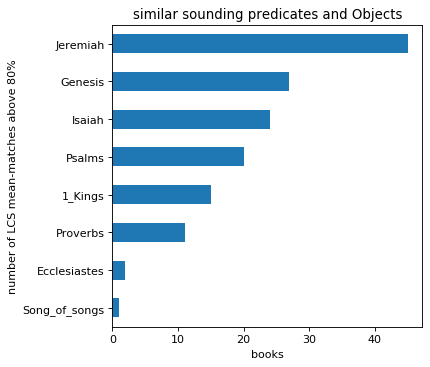

In [55]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
PredObjWordListsXLplot75.groupby("S1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('books')
plt.ylabel('number of LCS mean-matches above 80%')
plt.title('similar sounding predicates and Objects')
plt.show()

Lets see how the LCS phenomenon is distributed over the different books according to its matching percentage.

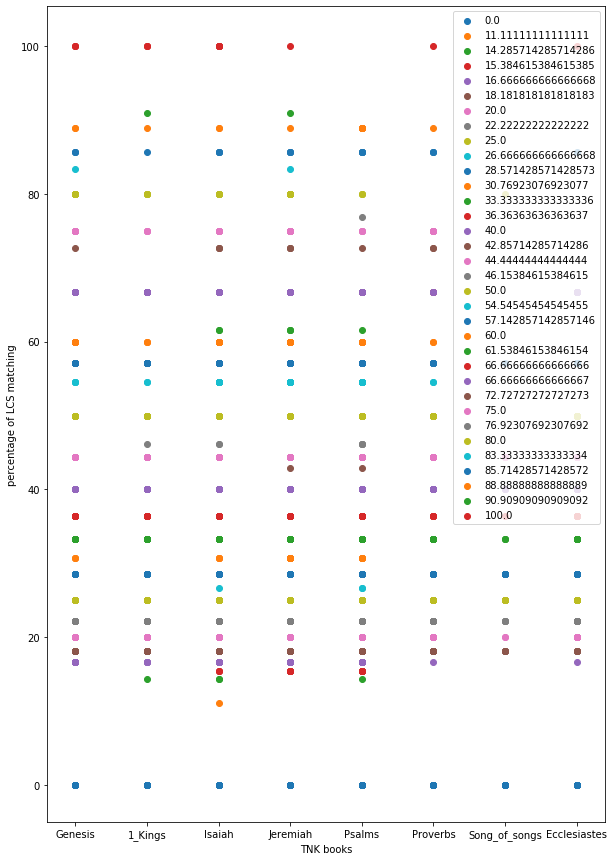

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 15)

for S1, df in PredObjWordListsXL.groupby('LCSObjcPredMeanMatch'):
    ax.scatter(x="S1", y="LCSObjcPredMeanMatch", data=df, label=S1)

ax.set_xlabel("TNK books")
ax.set_ylabel("percentage of LCS matching")
ax.legend();

Text(0.5, 20.799999999999983, 'OT books')

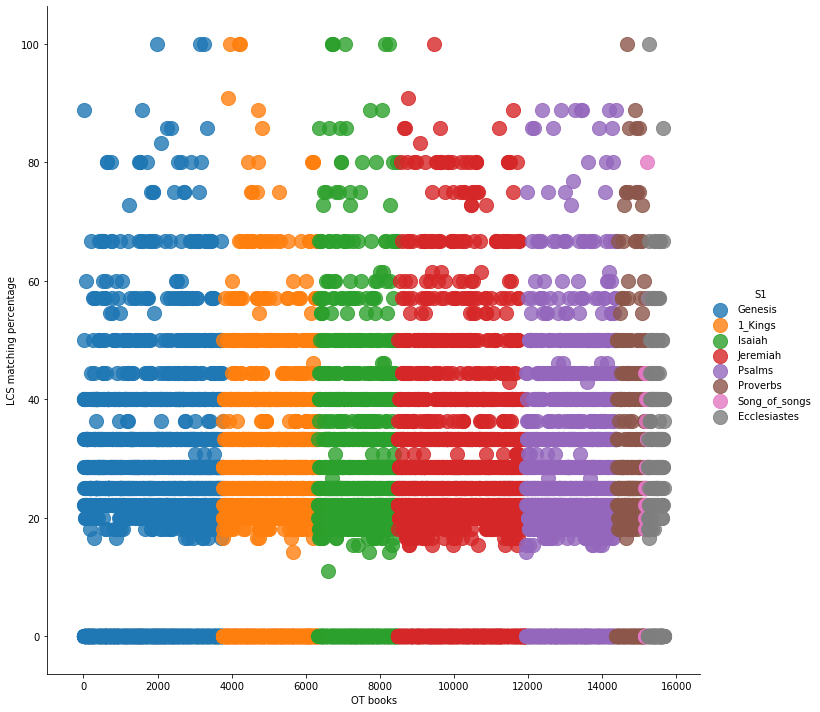

In [57]:
sns.lmplot(x="R", y="LCSObjcPredMeanMatch", data=PredObjWordListsXL, hue='S1', height=10, aspect=1/1, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('LCS matching percentage')
ax.set_xlabel('OT books')

We can see quickly that Isiah, Jeremiah, and Psalms have a much higher density of high matching (>=80%) LCS cases.

## Distributions in Isiah's chapters
Lets have a look at the distribution of the phenomena over the different chapters in Isiah. While we do so, lets compare the >=90% matching with a >=60% matching in Isiah.

In [58]:
PredObjWordListsXLplot60 = PredObjWordListsXL[PredObjWordListsXL.LCSObjcPredMeanMatch >= 60]

Text(0, 0.5, 'LCS matching percentage')

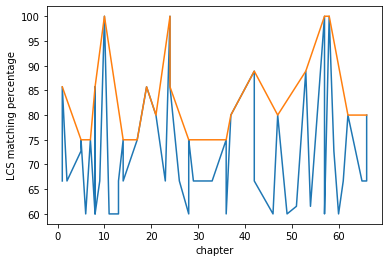

In [59]:
PredObjWordListsXLplot75Isa = PredObjWordListsXLplot75[PredObjWordListsXLplot75.S1 == 'Isaiah']
PredObjWordListsXLplot60Isa = PredObjWordListsXLplot60[PredObjWordListsXLplot60.S1 == 'Isaiah']

plt.plot(PredObjWordListsXLplot60Isa.S2,PredObjWordListsXLplot60Isa.LCSObjcPredMeanMatch)
plt.plot(PredObjWordListsXLplot75Isa.S2,PredObjWordListsXLplot75Isa.LCSObjcPredMeanMatch)
plt.xlabel("chapter")
plt.ylabel("LCS matching percentage")

Now, lets see how the LCS phenomenon is distributed over the different chapters of Isiah:

In [60]:
PredObjWordListsXLIsaAll = PredObjWordListsXL[PredObjWordListsXL.S1 == 'Isaiah']

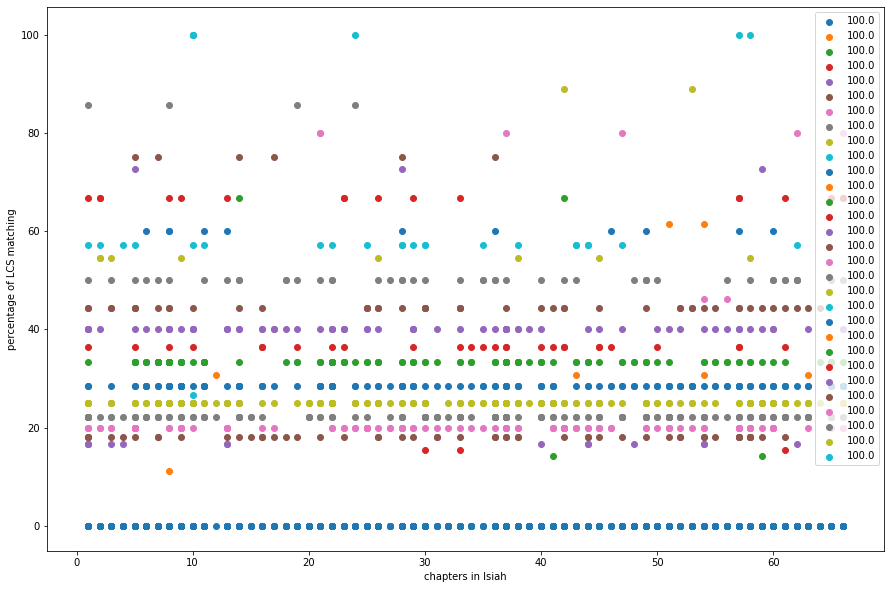

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

for S2, df in PredObjWordListsXLIsaAll.groupby('LCSObjcPredMeanMatch'):
    ax.scatter(x="S2", y="LCSObjcPredMeanMatch", data=df, label=S1)

ax.set_xlabel("chapters in Isiah")
ax.set_ylabel("percentage of LCS matching")
ax.legend();

Text(0.5, 20.799999999999983, 'chapters')

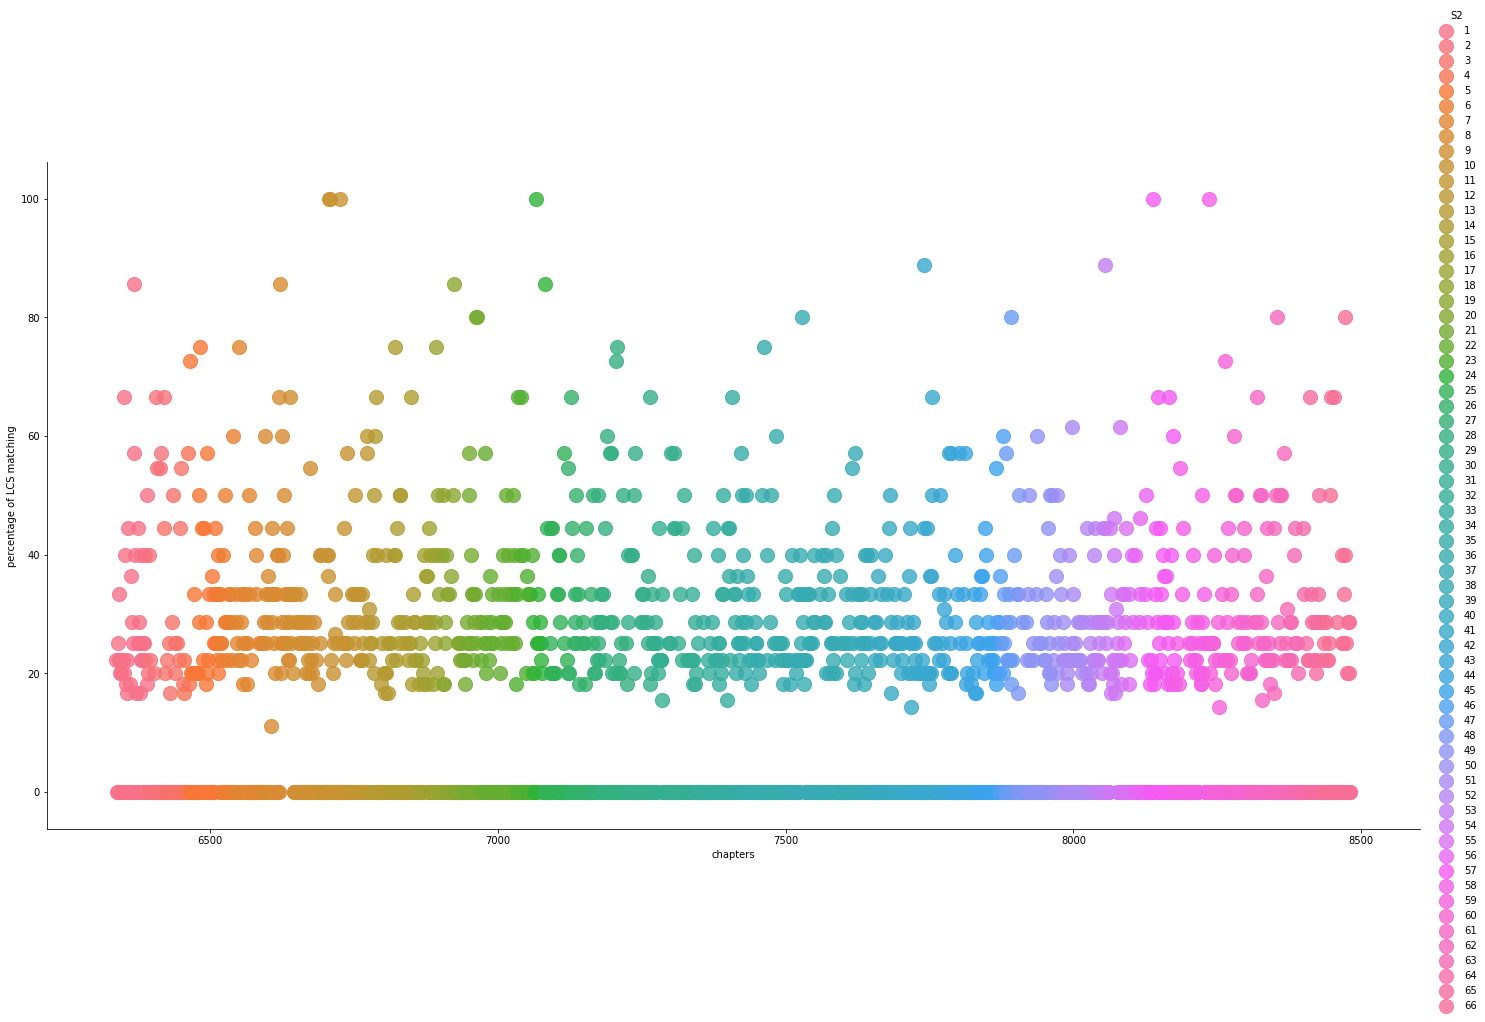

In [62]:
sns.lmplot(x="R", y="LCSObjcPredMeanMatch", data=PredObjWordListsXLIsaAll, hue='S2', height=10, aspect=2/1, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('percentage of LCS matching')
ax.set_xlabel('chapters')

# MISC

## version: Rosettacode.org

In [63]:
#https://rosettacode.org/wiki/Longest_common_subsequence#Python


def lcs2(a, b):
    # generate matrix of length of longest common subsequence for substrings of both words
    lengths = [[0] * (len(b)+1) for _ in range(len(a)+1)]
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i+1][j+1] = lengths[i][j] + 1
            else:
                lengths[i+1][j+1] = max(lengths[i+1][j], lengths[i][j+1])
 
    # read a substring from the matrix
    result = ''
    j = len(b)
    for i in range(1, len(a)+1):
        if lengths[i][j] != lengths[i-1][j]:
            result += a[i-1]
 
    return result

In [64]:
a = "GTY"
b = "GXTXAYB"
lcs2(a,b)

'GTY'